# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Basketball Team Analysis Report

<font color=darkblue>
Objective:
    <b>Get a data-driven analysis and recommendation of best teams for winning new deal.</b> 
    

**Prepared By:** Vishnudas R (Batch Feb21-D)

In [456]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

In [457]:
%matplotlib inline
sns.set(color_codes=True)

In [458]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### 1. Read and analyse the data

In [459]:
bbData = pd.read_csv("Basketball.csv");

In [460]:
bbData.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [461]:
bbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [462]:
bbData.shape

(61, 13)

<font color='darkblue'>
<b> Observations for data-cleaning

1. There are a total of 61 rows and 13 features
2. All features seem important for the analysis and none of the columns give redundant data. Therefore, not removing any columns.
3. Current dataset are all object types and would need type conversion so that the *Team* column is String, *TeamLaunched* be year type data and all remaining columns should have been numerical data. However, 
4. The TeamLaunched column has a non-standardised data. Would need to convert to a standardised form.
5. Many of the columns have empty values. On analysis of those columns we have substitutes empty values for cetain columsn with 0. Also will replace the - (dashed) symbols with 0

In [463]:
bbData['Team'].nunique()

61

There are 61 teams

## 2. Data-Cleaning

<font color='darkblue'>
1. Convert to appropriate data-type

In [464]:
#will take only the first part of launch year for consistency
def cleanDate(date):
    match = re.search("\d{4}", date)
    return match.group(0)

def makeTeamNumberOnly(teamName):
    teamName = teamName.replace("Team ","")
    return teamName

In [465]:
# Except Team and TeamLaunch columns, every other columns should be converted to int type. 
cols = bbData.columns.drop('Team').drop('TeamLaunch')
print(cols)

Index(['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'HighestPositionHeld'],
      dtype='object')


<font color="darkblue">
2. Replace invalid or missing values with 0

In [466]:
# This step will convert every value in the columns other than Team and TeamLaunch to int value. 
# Whenever, any invalid values are encountered such as - it will be changed to 0
bbData[cols] = bbData[cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [467]:
# Next we apply the cleanDate() to every value in the column TeamLaunch so we get a consistent year format
bbData['TeamLaunch'] = bbData['TeamLaunch'].apply(cleanDate)
# now that we have valid year dates, we convert it to type int
bbData['TeamLaunch'] = bbData['TeamLaunch'].astype(int)
# we change the type of 'Team' to number, which will help us plot in graphs easier
bbData['Team'] = bbData['Team'].apply(makeTeamNumberOnly)
bbData['Team'] = bbData['Team'].astype(int)

In [468]:
bbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Team                 61 non-null     int32
 1   Tournament           61 non-null     int32
 2   Score                61 non-null     int32
 3   PlayedGames          61 non-null     int32
 4   WonGames             61 non-null     int32
 5   DrawnGames           61 non-null     int32
 6   LostGames            61 non-null     int32
 7   BasketScored         61 non-null     int32
 8   BasketGiven          61 non-null     int32
 9   TournamentChampion   61 non-null     int32
 10  Runner-up            61 non-null     int32
 11  TeamLaunch           61 non-null     int32
 12  HighestPositionHeld  61 non-null     int32
dtypes: int32(13)
memory usage: 3.2 KB


3. Check and verify null values are removed

In [469]:
pd.DataFrame(bbData.isnull().sum(), columns=['No. of missing values'])

,No. of missing values
Team,0
Tournament,0
Score,0
PlayedGames,0
WonGames,0
DrawnGames,0
LostGames,0
BasketScored,0
BasketGiven,0
TournamentChampion,0


In [470]:
bbData.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,57,1,34,38,8,10,20,38,66,0,0,2009,20
57,58,1,22,30,7,8,15,37,57,0,0,1956,16
58,59,1,19,30,7,5,18,51,85,0,0,1951,16
59,60,1,14,30,5,4,21,34,65,0,0,1955,15
60,61,1,0,0,0,0,0,0,0,0,0,2017,9


Team 61's score has not been updated. Therefore, we will drop that row.

In [471]:
bbData = bbData.drop(60)
bbData.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
55,56,1,35,38,8,11,19,36,55,0,0,2016,17
56,57,1,34,38,8,10,20,38,66,0,0,2009,20
57,58,1,22,30,7,8,15,37,57,0,0,1956,16
58,59,1,19,30,7,5,18,51,85,0,0,1951,16
59,60,1,14,30,5,4,21,34,65,0,0,1955,15


In [472]:
bbData.describe()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,30.500000,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,1957.950000,7.050000
std,17.464249,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,26.646732,5.315232
min,1.000000,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1929.000000,1.000000
25%,15.750000,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,1934.750000,3.000000
50%,30.500000,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,1950.500000,6.000000
75%,45.250000,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,1977.250000,10.000000
max,60.000000,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,2016.000000,20.000000


## 3. Find Co-Relations

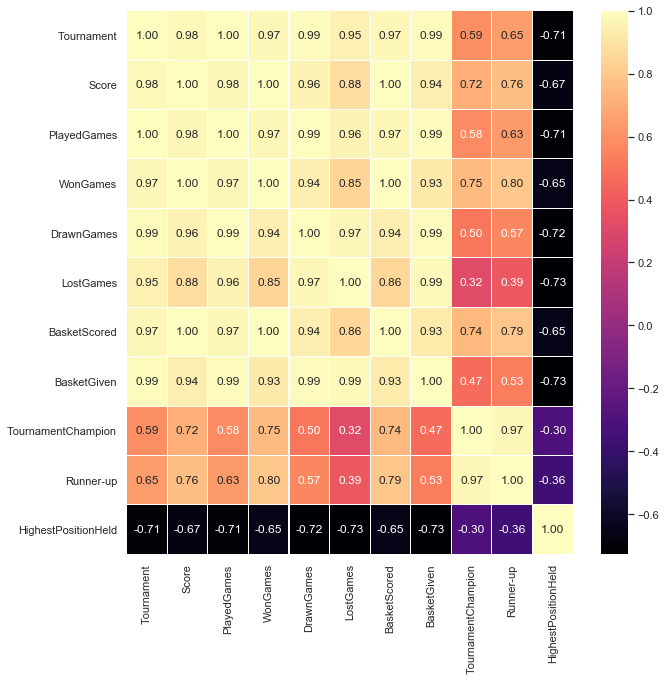

In [473]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(bbData[cols].corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

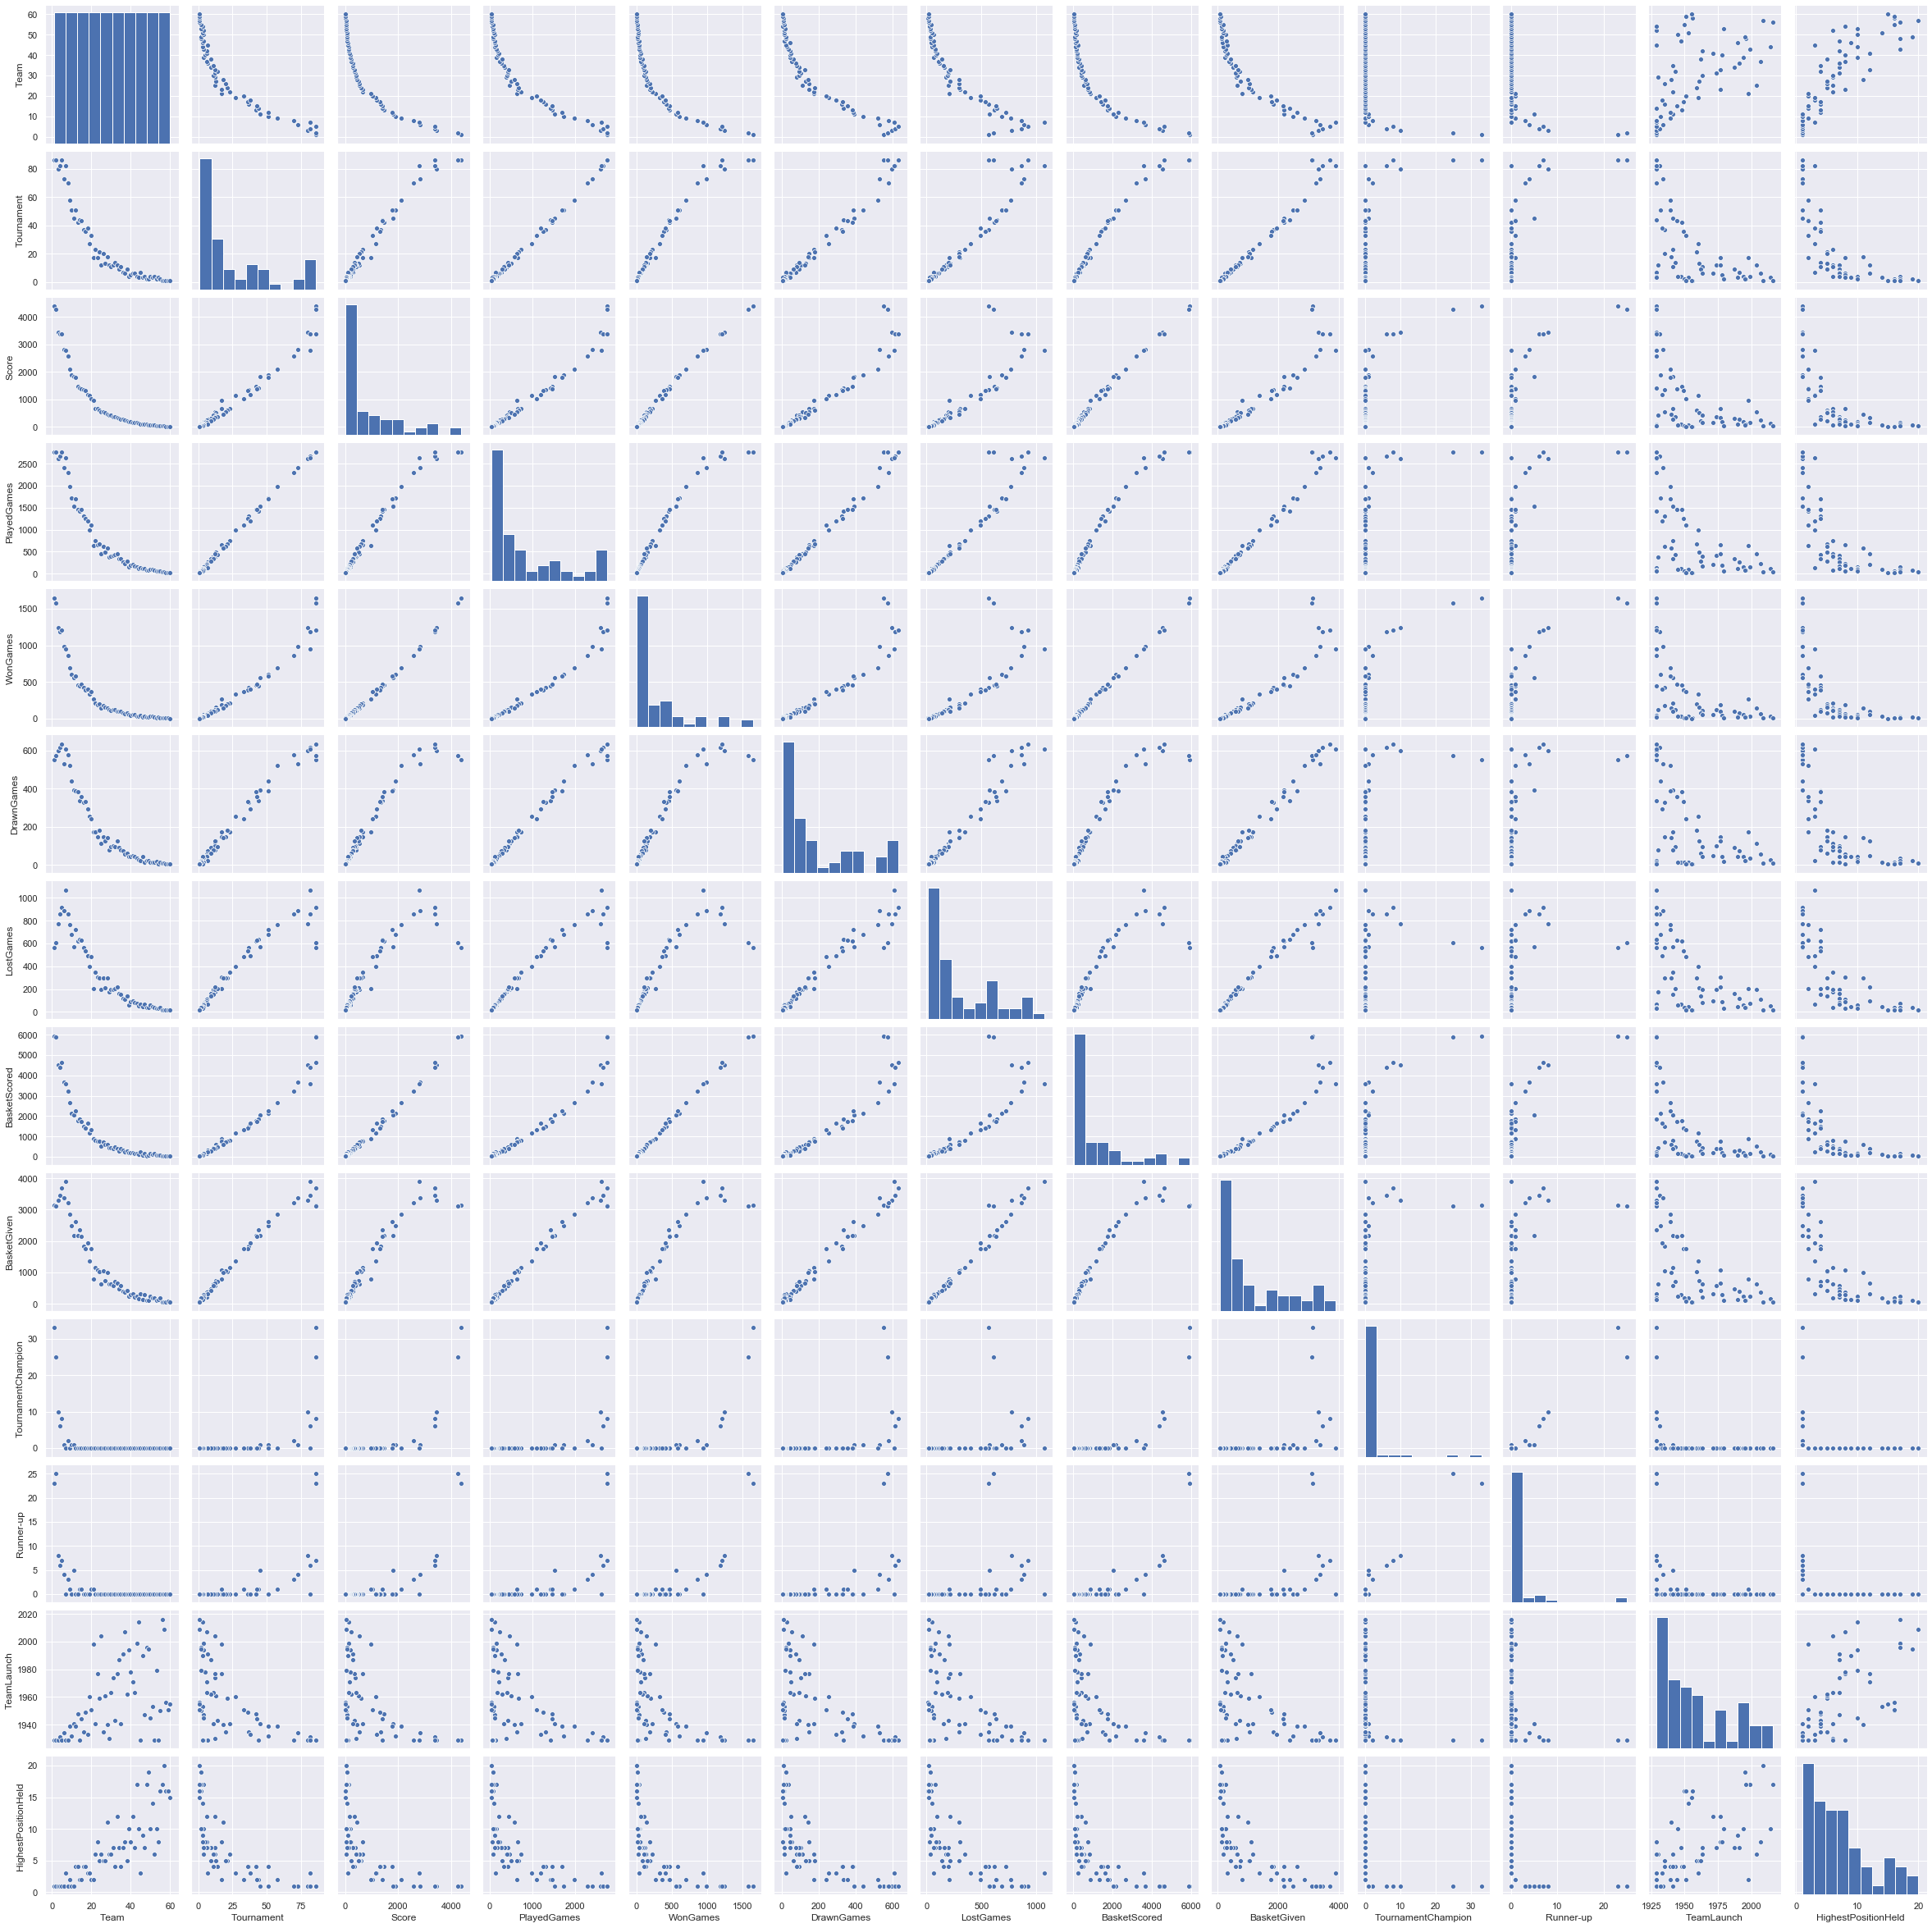

In [474]:
sns.pairplot(bbData)

## 4. EDA

1. Team Launch Summary (based on current year 2021):

		Oldest team: Team 1 which was launched in 1929 and is 92 years old
		Youngest team: Team 56 was launched in 2016
		Median age of teams: 70 (1950)
		Latest 25% quartile (Easier to acquire than old teams): 1977

		We suggest proposing deals for teams launched after 1978, since the older teams might be harder to buy
		Number of teams launched post 1978: 15


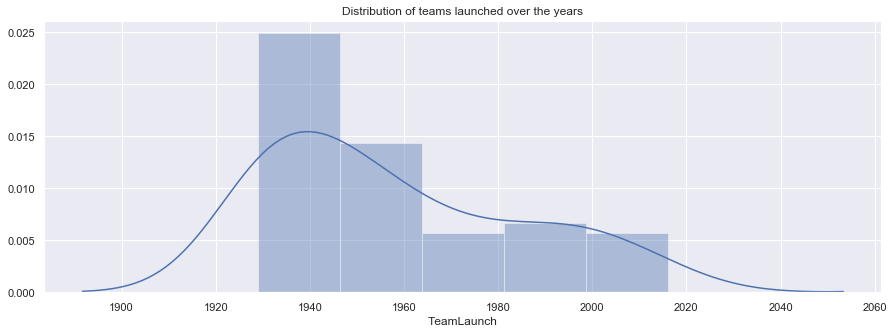

In [475]:
print(color.BOLD+color.PURPLE+"1. Team Launch Summary (based on current year "+str(date.today().year)+"):\n"+color.END)
print("\t\t"+color.BOLD+ "Oldest team:"+color.END+" Team "+ str(bbData._get_value(bbData['TeamLaunch'].idxmin(),'Team'))+" which was launched in "+str(bbData['TeamLaunch'].min())+ " and is "+str((date.today().year-bbData['TeamLaunch'].min()))+" years old")
print("\t\t"+color.BOLD+"Youngest team:"+color.END+" Team "+ str(bbData._get_value(bbData['TeamLaunch'].idxmax(),'Team'))+" was launched in "+str(bbData['TeamLaunch'].max()))
print("\t\t"+color.BOLD+"Median age of teams: "+color.END+str(int(date.today().year-bbData['TeamLaunch'].median()))+" ("+str(int(bbData['TeamLaunch'].median()))+")")
print("\t\t"+color.BOLD+"Latest 25% quartile (Easier to acquire than old teams): "+str(int(np.percentile(bbData.TeamLaunch, 75))))
post1978 = bbData[(bbData['TeamLaunch'] >= 1978)]
print("\n\t\t"+color.RED+"We suggest proposing deals for teams launched after 1978, since the older teams might be harder to buy"+color.END)
print("\t\t"+color.BOLD+"Number of teams launched post 1978: "+str(len(post1978)))
plt.figure(figsize=(15,5))
plt.title("Distribution of teams launched over the years")
sns.distplot(bbData['TeamLaunch']);

In [476]:
print(color.BOLD+color.PURPLE+"2. Performance Summary of teams\n"+color.END)
print(color.BOLD+"Team with highest goals:"+color.END+" Team "+ str(bbData._get_value(bbData['WonGames'].idxmax(),'Team')))
print(color.BOLD+"Team with highest holding Tournament championship:"+color.END+" Team "+ str(bbData._get_value(bbData['TournamentChampion'].idxmax(),'Team')))

print(color.BOLD+"Team launched post 1978 with highest wins of "+str(top10['WonGames'].max())+" (Median: "+str(int(bbData['WonGames'].median()))+"):"+color.END+" Team "+ str(top10._get_value(top10['WonGames'].idxmax(),'Team')))
print(color.BOLD+"Team launched post 1978 with highest Baskets Scored of "+str(top10['BasketScored'].max())+" (Median: "+str(int(bbData['BasketScored'].median()))+"):"+color.END+" Team "+ str(top10._get_value(top10['BasketScored'].idxmax(),'Team')))

2. Performance Summary of teams

Team with highest goals: Team 1
Team with highest holding Tournament championship: Team 1
Team launched post 1978 with highest wins of 266 (Median: 124): Team 21
Team launched post 1978 with highest Baskets Scored of 892 (Median: 444): Team 21


**Summary:** Older teams have played around 80 tournaments whereas younger teams from Team 25 and upwards have played fewer than 20 tournaments

3. Distribution of tournaments played by various teams



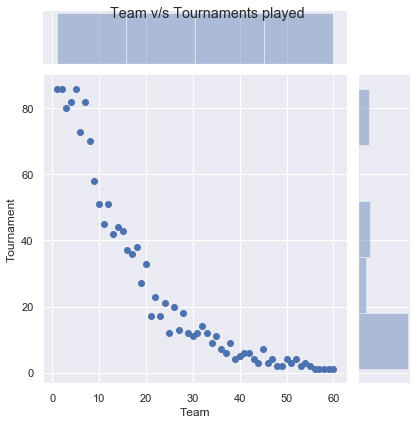

In [477]:
print(color.BOLD+color.PURPLE+"3. Distribution of tournaments played by various teams\n"+color.END)
p = sns.jointplot(bbData['Team'], bbData['Tournament']);
p.fig.suptitle("Team v/s Tournaments played");

**Therefore, the older teams have played more matches, have more wins and have held highest positions among the relatively younger teams. Below is a bar plot of highest positions held by all the teams**

4. Overall distribution of top positions held for all teams



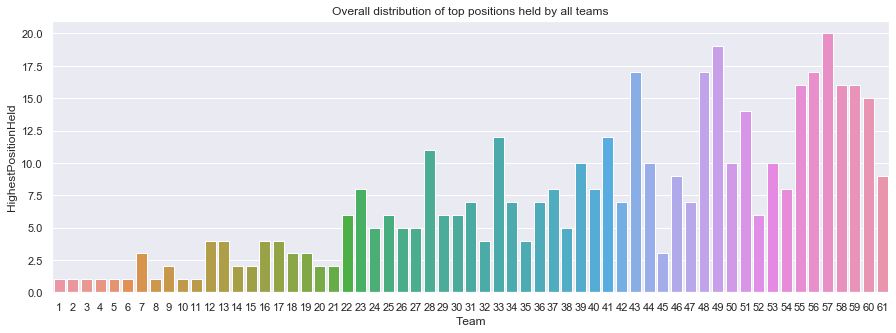

In [478]:
print(color.BOLD+color.PURPLE+"4. Overall distribution of top positions held for all teams\n"+color.END)
plt.figure(figsize=(15,5))
plt.title("Overall distribution of top positions held by all teams")
ax = sns.barplot(x='Team', y='HighestPositionHeld', data=topPos)

5. Teams launched after 1978 within top 10 highest positions held

Suggestion: There are 10 teams in top 10 launched after 1978 which we would strongly recommend


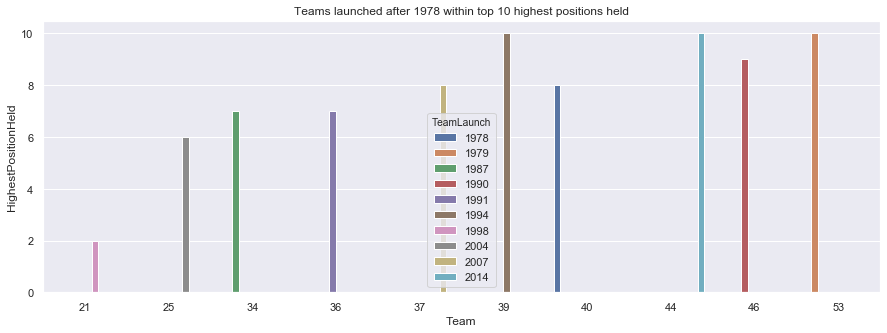

In [479]:
print(color.BOLD+color.PURPLE+"5. Teams launched after 1978 within top 10 highest positions held\n"+color.END)
top10 = bbData[(bbData['HighestPositionHeld'] <= 10) & (bbData['TeamLaunch'] >= 1978)]
print(color.BOLD+"Suggestion:"+color.END+" There are "+str(len(top10))+" teams in top 10 launched after 1978 which we would strongly recommend")
plt.figure(figsize=(15,5))
plt.title("Teams launched after 1978 within top 10 highest positions held")
ax = sns.barplot(x='Team', y='HighestPositionHeld',hue='TeamLaunch', data=top10)
#print("Team "+str(bbData.iloc[x]['Team'])+":"+str(bbData.iloc[x]['TeamLaunch']))

The tournament experience of each of these 11 teams is shown in the below chart

6.Number of tournament experience held by the teams suggested by us



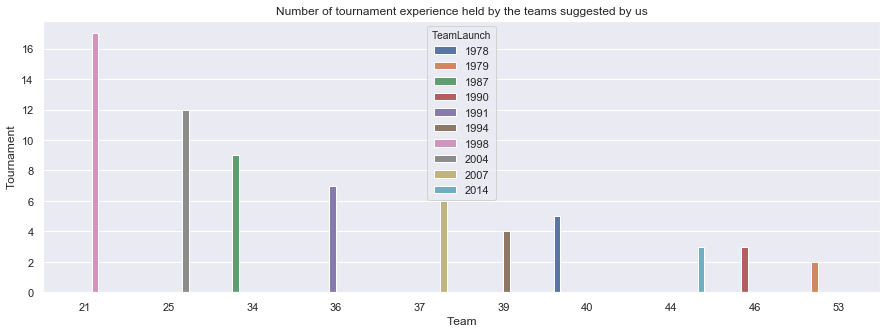

In [480]:
print(color.BOLD+color.PURPLE+"6.Number of tournament experience held by the teams suggested by us\n"+color.END)
plt.figure(figsize=(15,5))
plt.title("Number of tournament experience held by the teams suggested by us")
ax = sns.barplot(x='Team', y='Tournament',hue='TeamLaunch', data=top10)

**Note: Older teams have played more games and hence they have higher number of games won. To get a fair idea of which team is performing better, we have taken percentage of wins below.**

In [481]:
bbData['WinPercent'] = (bbData['WonGames']/(bbData['LostGames']+bbData['DrawnGames']+bbData['LostGames']))*100
top10['WinPercent'] = (top10['WonGames']/(top10['LostGames']+top10['DrawnGames']+top10['LostGames']))*100
bbData['LostPercent'] = (bbData['LostGames']/(bbData['LostGames']+bbData['DrawnGames']+bbData['LostGames']))*100
top10['LostPercent'] = (top10['WonGames']/(top10['LostGames']+top10['DrawnGames']+top10['LostGames']))*100
bbData['DrawnPercent'] = (bbData['DrawnGames']/(bbData['LostGames']+bbData['DrawnGames']+bbData['LostGames']))*100
top10['DrawnPercent'] = (top10['WonGames']/(top10['LostGames']+top10['DrawnGames']+top10['LostGames']))*100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

7.Percentage of win among all the teams



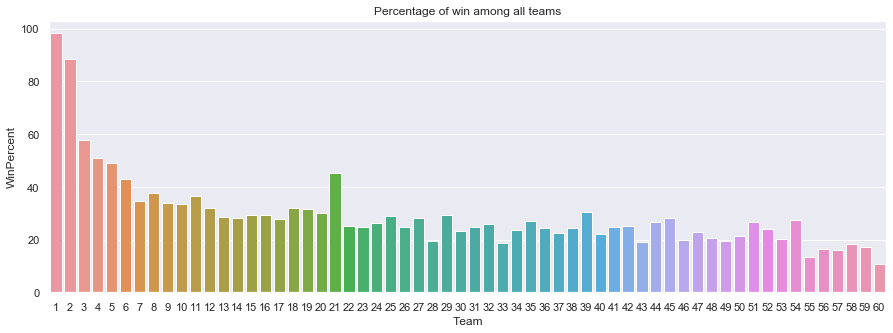

In [482]:
print(color.BOLD+color.PURPLE+"7.Percentage of win among all the teams\n"+color.END)
plt.figure(figsize=(15,5))
plt.title("Percentage of win among all teams")
ax = sns.barplot(x='Team', y='WinPercent', data=bbData)

7.1 Percentage distribution of wins among all the teams



Text(0.5, 0.98, 'Percentage distribution of wins by all teams')

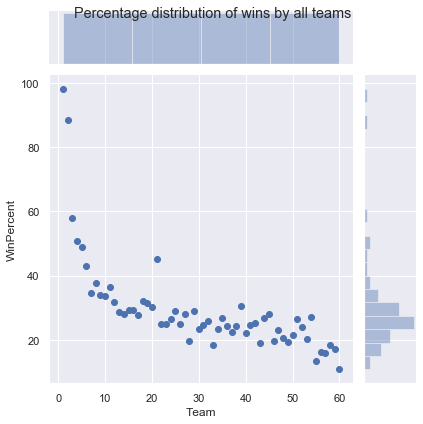

In [483]:
print(color.BOLD+color.PURPLE+"7.1 Percentage distribution of wins among all the teams\n"+color.END)
p = sns.jointplot(bbData['Team'], bbData['WinPercent']);
p.fig.suptitle("Percentage distribution of wins by all teams")

8. Distribution of games lost by all teams



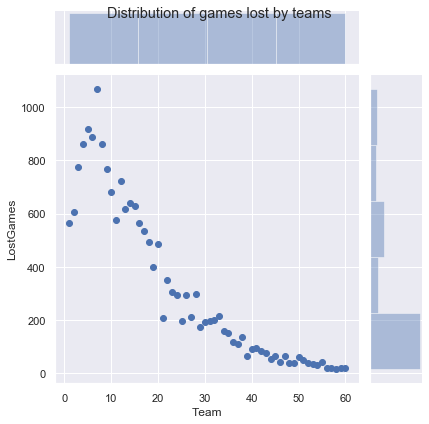

In [484]:
print(color.BOLD+color.PURPLE+"8. Distribution of games lost by all teams\n"+color.END)
p = sns.jointplot(bbData['Team'], bbData['LostGames']);
p.fig.suptitle("Distribution of games lost by teams");

9.A linear regression plot on win percentage v/s Team



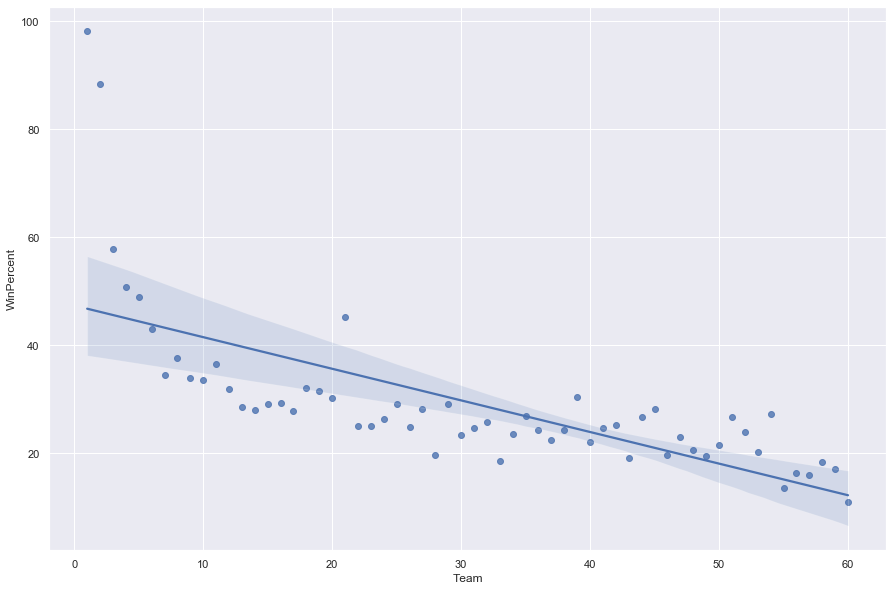

In [485]:
print(color.BOLD+color.PURPLE+"9.A linear regression plot on win percentage v/s Team\n"+color.END)
figure = plt.figure(figsize=(15,10))
ax = sns.regplot(x='Team',y='WinPercent', data=bbData ) # regression plot - scatter plot with a regression line

## 5. Suggestions on Deal Proposal

1. Older teams have more experience and wins. However, they might already be managed. We have taken teams launched after 1978 has the median to suggest teams for deals.
2. Older teams might be tired with the current management, however, without more information cannot comment upon possible deals.
3. 10 Teams are seen has performing well, Team 21 is in a very good position with respect to tournament experience as well as win percentage.
4. Top 10 suggested teams are : 

In [486]:

print("Teams: "+str(top10['Team'].values.tolist())+"\nWinPercent"+str(round(top10['WinPercent'],2).values.tolist()))

Teams: [21, 25, 34, 36, 37, 39, 40, 44, 46, 53]
WinPercent[45.24, 29.05, 23.53, 24.36, 22.46, 30.41, 22.12, 26.72, 19.7, 20.24]


In [487]:
top10

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WinPercent,LostPercent,DrawnPercent
20,21,17,970,646,266,172,208,892,789,0,1,1998,2,45.238095,45.238095,45.238095
24,25,12,553,456,147,112,197,520,633,0,0,2004,6,29.051383,29.051383,29.051383
33,34,9,293,346,96,92,158,291,489,0,0,1987,7,23.529412,23.529412,23.529412
35,36,7,277,270,76,76,118,320,410,0,0,1991,7,24.358974,24.358974,24.358974
36,37,6,242,228,62,56,110,244,366,0,0,2007,8,22.463768,22.463768,22.463768
38,39,4,190,160,52,45,63,199,241,0,0,1994,10,30.409357,30.409357,30.409357
39,40,5,188,186,50,46,90,202,296,0,0,1978,8,22.123894,22.123894,22.123894
43,44,3,132,114,35,27,52,139,167,0,0,2014,10,26.717557,26.717557,26.717557
45,46,3,96,114,26,44,44,101,139,0,0,1990,9,19.696970,19.696970,19.696970
52,53,2,52,68,17,18,33,71,116,0,0,1979,10,20.238095,20.238095,20.238095


## 6. Data Quality and Improvement Suggestions

1. We could not acertain which teams are currently managed or needs management. We had to take the median number of years to propose which team might be available for making new deals. Two columns could be added to the dataset (i) Whether currently managed or not (ii) Since when they are managed by the current management (iii) Relationship status of team with management -Satisfied, unhappy, Unsure

2. With respect to the data quality, the following has to be rectified
    1. The TeamLaunched column is noticed to have year in a mixed format. This has to be made consistent. May use YYYY format
    2. There are empty values or - sympbol in many columns where it should have been 0. This can be seen in column such as TournamentChampionship among others. Should use a numeric value 0 instead where appropriate.
    3. For Team 61 only partial data has been filled.
    